## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 26)

In [3]:
caly_df.head()

,Województwo,Data urodzenia,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,137,127,121,113,106,128,109,107,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,126,123,109,113,103,128,114,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,126,120,110,107,102,124,113,112,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,133,111,104,110,99,114,114,113,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,125,115,91,95,101,124,134,129,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 26)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([  2.,   0.,   2.,   9.,  11.,  12.,  29.,  25.,  22.,  71., 121.,
         61., 166., 174., 106., 234., 190.,  98., 148., 122.,  53.,  78.,
         58.,  20.,  33.,  13.,   9.,   5.,   1.,   2.]),
 array([ 82.        ,  83.66666667,  85.33333333,  87.        ,
         88.66666667,  90.33333333,  92.        ,  93.66666667,
         95.33333333,  97.        ,  98.66666667, 100.33333333,
        102.        , 103.66666667, 105.33333333, 107.        ,
        108.66666667, 110.33333333, 112.        , 113.66666667,
        115.33333333, 117.        , 118.66666667, 120.33333333,
        122.        , 123.66666667, 125.33333333, 127.        ,
        128.66666667, 130.33333333, 132.        ]),
 <BarContainer object of 30 artists>)

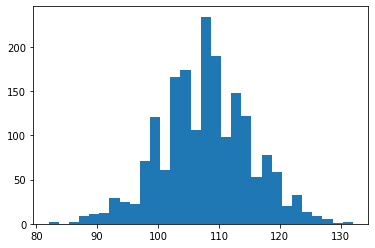

In [13]:
plt.hist(caly_df["OMC"],bins=30)

In [14]:
caly_df["OMC"].describe()

count    1875.000000
mean      107.665067
std         7.413236
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

In [15]:
caly_df.loc[(caly_df["OMC"]<=103), "Klasa"] = "Małe"
caly_df.loc[(103<caly_df["OMC"]) & (caly_df["OMC"]<=107), "Klasa"] = "Średnie"
caly_df.loc[(107<caly_df["OMC"]) & (caly_df["OMC"]<=112), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["OMC"]>112, "Klasa"] = "Ekstrimum"

(array([415.,   0.,   0., 531.,   0.,   0., 465.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

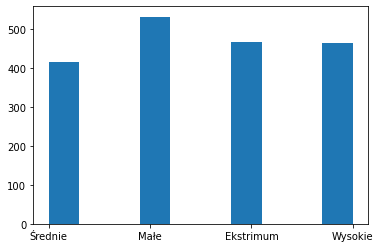

In [16]:
plt.hist(caly_df["Klasa"])

In [17]:
caly_df["Klasa"].value_counts()

Małe         531
Ekstrimum    465
Wysokie      464
Średnie      415
Name: Klasa, dtype: int64

In [18]:
list(caly_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [19]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['OMC']
test_label=test_df['OMC']
#val_label=val_df['IE']

del train_df['OMC']
del test_df['OMC']
#del val_df['IE']


In [20]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [21]:
len(list(train_df))

46

## 1.2 Standaryzacja

In [22]:
train_df.iloc[:,:23]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
1119,133,115,105,107,111,113,104,105,103,96,...,1325,474,-8,429,0,107.0,109.0,117.0,111.0,114.0
1093,125,117,115,104,98,123,120,118,120,99,...,478,523,41,288,16,106.0,101.0,106.0,120.0,111.0
613,123,119,101,108,103,124,116,114,116,102,...,1091,418,-3,287,-8,107.0,107.0,112.0,125.0,118.0
3,131,113,98,100,103,117,115,113,116,102,...,902,516,17,378,10,105.0,103.0,110.0,118.0,109.0
816,121,112,105,94,103,116,120,117,122,99,...,1040,379,-5,270,-8,90.0,93.0,100.0,117.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,129,113,90,100,100,121,120,116,121,105,...,843,602,30,316,5,101.0,100.0,114.0,121.0,111.0
608,126,118,108,108,110,116,113,107,113,117,...,783,374,6,348,11,108.0,107.0,117.0,115.0,113.0
273,125,111,96,108,107,111,109,108,107,104,...,983,398,0,321,0,107.0,106.0,116.0,115.0,111.0
1478,128,109,108,111,104,106,115,114,119,93,...,888,491,15,339,6,108.0,108.0,105.0,108.0,111.0


In [23]:
scaler = StandardScaler()
train_df.iloc[:,:23]=scaler.fit_transform(train_df.iloc[:,:23])
test_df.iloc[:,:23]=scaler.fit_transform(test_df.iloc[:,:23])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [24]:
train_df.iloc[:,20:23]

,nr,w,og
1119,0.680709,-1.138843,-0.140075
1093,-0.819652,0.104636,-0.584915
613,-0.001273,0.795458,0.453044
3,-0.274066,-0.171692,-0.881474
816,-1.638030,-0.309857,-1.178034
...,...,...,...
110,0.271520,0.242801,-0.584915
608,0.680709,-0.586185,-0.288355
273,0.544313,-0.586185,-0.584915
1478,-0.956048,-1.553336,-0.584915


In [25]:
train_df.shape

(1500, 46)

In [26]:
test_df.shape

(375, 46)

In [27]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [28]:
train_df

array([[ 0.93447873, -0.3516274 , -0.26760885, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31999546, -0.07017537,  0.99231982, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63361401,  0.21127666, -0.77158032, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31999546, -0.91453145, -1.40154465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15043236, -1.19598348,  0.11036975, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16318618, -1.19598348, -2.40948759, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [30]:
train_label

array([ 97, 104, 103, ..., 104, 101, 102], dtype=int64)

In [31]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [32]:
p = {'first_neuron':[160], #
     'hidden_neuron':[25],#
     'hidden_layers':[1],  #1 must
     'batch_size': [64], # 64
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['ones'], # ones 
     'epochs': [20000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['selu'], # selu
     'batc_normalization':[True,False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     
#     
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [33]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=5,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [34]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja OMC')

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

{'activation_layer': 'selu', 'batc_normalization': True, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 1s 992us/sample - loss: 107.3258 - val_loss: 113.0192
Epoch 2/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 106.7483 - val_loss: 87.6245
Epoch 3/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 106.0840 - val_loss: 90.3234
Epoch 4/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 105.4197 - val_loss: 93.8289
Epoch 5/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 104.6943 - val_loss: 96.5735
Epoch 6/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 103.9506 - val_loss: 98.2862
Epoch 7/20000
1500/150

Epoch 147/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.5211 - val_loss: 1.4141
Epoch 148/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5176 - val_loss: 1.4583
Epoch 149/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4950 - val_loss: 1.4417
Epoch 150/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4831 - val_loss: 1.4709
Epoch 151/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5556 - val_loss: 1.4366
Epoch 152/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5182 - val_loss: 1.4325
Epoch 153/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5383 - val_loss: 1.4242
Epoch 154/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5480 - val_loss: 1.4594
Epoch 155/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5825 - val_loss: 1.4695
Epoch 156/

1500/1500 [==============================] - 0s 35us/sample - loss: 1.4351 - val_loss: 1.4697
Epoch 296/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4613 - val_loss: 1.4217
Epoch 297/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5073 - val_loss: 1.4279
Epoch 298/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4759 - val_loss: 1.3979
Epoch 299/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4462 - val_loss: 1.4125
Epoch 300/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5716 - val_loss: 1.4466
Epoch 301/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5314 - val_loss: 1.3837
Epoch 302/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4433 - val_loss: 1.4236
Epoch 303/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5218 - val_loss: 1.3807
Epoch 304/20000
1500/1500 

1500/1500 [==============================] - 0s 37us/sample - loss: 1.4021 - val_loss: 1.3899
Epoch 444/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.5400 - val_loss: 1.3613
Epoch 445/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4674 - val_loss: 1.3893
Epoch 446/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4057 - val_loss: 1.3562
Epoch 447/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.5195 - val_loss: 1.3753
Epoch 448/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4349 - val_loss: 1.3772
Epoch 449/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4826 - val_loss: 1.3644
Epoch 450/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4136 - val_loss: 1.3626
Epoch 451/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5378 - val_loss: 1.3637
Epoch 452/20000
1500/1500 

1500/1500 [==============================] - 0s 38us/sample - loss: 1.4546 - val_loss: 1.3641
Epoch 592/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5467 - val_loss: 1.3672
Epoch 593/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5150 - val_loss: 1.3621
Epoch 594/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.4468 - val_loss: 1.3703
Epoch 595/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4888 - val_loss: 1.3639
Epoch 596/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5190 - val_loss: 1.3449
Epoch 597/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4524 - val_loss: 1.3661
Epoch 598/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 1.5376 - val_loss: 1.3578
Epoch 599/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4548 - val_loss: 1.3697
Epoch 600/20000
1500/1500 

1500/1500 [==============================] - 0s 36us/sample - loss: 1.5929 - val_loss: 1.3621
Epoch 740/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4785 - val_loss: 1.3329
Epoch 741/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4591 - val_loss: 1.3564
Epoch 742/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3746 - val_loss: 1.3548
Epoch 743/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4236 - val_loss: 1.3336
Epoch 744/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4612 - val_loss: 1.3236
Epoch 745/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4774 - val_loss: 1.3716
Epoch 746/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4005 - val_loss: 1.3480
Epoch 747/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4844 - val_loss: 1.3194
Epoch 748/20000
1500/1500 

1500/1500 [==============================] - 0s 35us/sample - loss: 1.4245 - val_loss: 1.3333
Epoch 888/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3953 - val_loss: 1.3611
Epoch 889/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4357 - val_loss: 1.2925
Epoch 890/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4072 - val_loss: 1.3290
Epoch 891/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4246 - val_loss: 1.3293
Epoch 892/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4462 - val_loss: 1.3252
Epoch 893/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4787 - val_loss: 1.3265
Epoch 894/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4146 - val_loss: 1.3351
Epoch 895/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4595 - val_loss: 1.3202
Epoch 896/20000
1500/1500 

1500/1500 [==============================] - 0s 34us/sample - loss: 1.5188 - val_loss: 1.2792
Epoch 1036/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4458 - val_loss: 1.2572
Epoch 1037/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4311 - val_loss: 1.2751
Epoch 1038/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3364 - val_loss: 1.2888
Epoch 1039/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4659 - val_loss: 1.2610
Epoch 1040/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4496 - val_loss: 1.2868
Epoch 1041/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4993 - val_loss: 1.2809
Epoch 1042/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3902 - val_loss: 1.2585
Epoch 1043/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5278 - val_loss: 1.2944
Epoch 1044/20000
1

Epoch 1109/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3841 - val_loss: 1.2659
Epoch 1110/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4443 - val_loss: 1.3151
Epoch 1111/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3961 - val_loss: 1.2541
Epoch 1112/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3707 - val_loss: 1.2626
Epoch 1113/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5050 - val_loss: 1.2475
Epoch 1114/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4916 - val_loss: 1.2848
Epoch 1115/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4786 - val_loss: 1.2694
Epoch 1116/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4532 - val_loss: 1.2714
Epoch 1117/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5756 - val_loss: 1.2637
E

Epoch 1183/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.6245 - val_loss: 1.2932
Epoch 1184/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3867 - val_loss: 1.2419
Epoch 1185/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4508 - val_loss: 1.2080
Epoch 1186/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4893 - val_loss: 1.2144
Epoch 1187/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4512 - val_loss: 1.2310
Epoch 1188/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4275 - val_loss: 1.2015
Epoch 1189/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3864 - val_loss: 1.2252
Epoch 1190/20000
1500/1500 [==============================] - 0s 43us/sample - loss: 1.3855 - val_loss: 1.2232
Epoch 1191/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3737 - val_loss: 1.2515
E

Epoch 1257/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3101 - val_loss: 1.2464
Epoch 1258/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4277 - val_loss: 1.1785
Epoch 1259/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4000 - val_loss: 1.2501
Epoch 1260/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4478 - val_loss: 1.2288
Epoch 1261/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4117 - val_loss: 1.1882
Epoch 1262/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3664 - val_loss: 1.2049
Epoch 1263/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4738 - val_loss: 1.2328
Epoch 1264/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5061 - val_loss: 1.1950
Epoch 1265/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4672 - val_loss: 1.2462
E

Epoch 1331/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3846 - val_loss: 1.2270
Epoch 1332/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3610 - val_loss: 1.2013
Epoch 1333/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4217 - val_loss: 1.1957
Epoch 1334/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3702 - val_loss: 1.2129
Epoch 1335/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4999 - val_loss: 1.1819
Epoch 1336/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4423 - val_loss: 1.1561
Epoch 1337/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.2677 - val_loss: 1.2015
Epoch 1338/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3775 - val_loss: 1.1715
Epoch 1339/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3676 - val_loss: 1.1858
E

Epoch 1405/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3125 - val_loss: 1.2047
Epoch 1406/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4549 - val_loss: 1.1986
Epoch 1407/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3970 - val_loss: 1.1776
Epoch 1408/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4926 - val_loss: 1.2240
Epoch 1409/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4648 - val_loss: 1.1727
Epoch 1410/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3743 - val_loss: 1.1682
Epoch 1411/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3128 - val_loss: 1.1971
Epoch 1412/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4542 - val_loss: 1.1489
Epoch 1413/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4123 - val_loss: 1.1441
E

Epoch 1479/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3320 - val_loss: 1.2628
Epoch 1480/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3751 - val_loss: 1.3349
Epoch 1481/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4201 - val_loss: 1.2966
Epoch 1482/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3903 - val_loss: 1.2205
Epoch 1483/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3589 - val_loss: 1.2781
Epoch 1484/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4556 - val_loss: 1.2300
Epoch 1485/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.2707 - val_loss: 1.2346
Epoch 1486/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3728 - val_loss: 1.3176
Epoch 1487/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4034 - val_loss: 1.2402
E

Epoch 1553/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3747 - val_loss: 1.1523
Epoch 1554/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3845 - val_loss: 1.1814
Epoch 1555/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4401 - val_loss: 1.2085
Epoch 1556/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4842 - val_loss: 1.2179
Epoch 1557/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3210 - val_loss: 1.2612
Epoch 1558/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3475 - val_loss: 1.2314
Epoch 1559/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3988 - val_loss: 1.2914
Epoch 1560/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4487 - val_loss: 1.2867
Epoch 1561/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3455 - val_loss: 1.2298
E

Epoch 1627/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3626 - val_loss: 1.1504
Epoch 1628/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4285 - val_loss: 1.1638
Epoch 1629/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3288 - val_loss: 1.1322
Epoch 1630/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5043 - val_loss: 1.1584
Epoch 1631/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4495 - val_loss: 1.1936
Epoch 1632/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5642 - val_loss: 1.1707
Epoch 1633/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3315 - val_loss: 1.1784
Epoch 1634/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4351 - val_loss: 1.1679
Epoch 1635/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3202 - val_loss: 1.1736
E

Epoch 1701/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4505 - val_loss: 1.1672
Epoch 1702/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3580 - val_loss: 1.2316
Epoch 1703/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4376 - val_loss: 1.2038
Epoch 1704/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3235 - val_loss: 1.1554
Epoch 1705/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.2753 - val_loss: 1.1747
Epoch 1706/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3702 - val_loss: 1.1690
Epoch 1707/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3711 - val_loss: 1.2365
Epoch 1708/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3394 - val_loss: 1.2329
Epoch 1709/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.2974 - val_loss: 1.1570
E

Epoch 1775/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4632 - val_loss: 1.2428
Epoch 1776/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3638 - val_loss: 1.1925
Epoch 1777/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4479 - val_loss: 1.2600
Epoch 1778/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3492 - val_loss: 1.1983
Epoch 1779/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4458 - val_loss: 1.1914
Epoch 1780/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4417 - val_loss: 1.2534
Epoch 1781/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3855 - val_loss: 1.1881
Epoch 1782/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4760 - val_loss: 1.2172
Epoch 1783/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3555 - val_loss: 1.2331
E

Epoch 1849/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3407 - val_loss: 1.1546
Epoch 1850/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4295 - val_loss: 1.2137
Epoch 1851/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4197 - val_loss: 1.1359
Epoch 1852/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3627 - val_loss: 1.1614
Epoch 1853/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3460 - val_loss: 1.2051
Epoch 1854/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3766 - val_loss: 1.1725
Epoch 1855/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4251 - val_loss: 1.2109
Epoch 1856/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4667 - val_loss: 1.1829
Epoch 1857/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3701 - val_loss: 1.2220
E

Epoch 1923/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4138 - val_loss: 1.1707
Epoch 1924/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3382 - val_loss: 1.1431
Epoch 1925/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4045 - val_loss: 1.1537
Epoch 1926/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4342 - val_loss: 1.2615
Epoch 1927/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.4360 - val_loss: 1.2679
Epoch 1928/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3127 - val_loss: 1.1912
Epoch 1929/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5222 - val_loss: 1.1978
Epoch 1930/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3545 - val_loss: 1.1703
Epoch 1931/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3857 - val_loss: 1.2744
E

Epoch 1997/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4097 - val_loss: 1.1512
Epoch 1998/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3779 - val_loss: 1.1675
Epoch 1999/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4738 - val_loss: 1.1689
Epoch 2000/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3473 - val_loss: 1.1304
Epoch 2001/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4493 - val_loss: 1.2396
Epoch 2002/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4737 - val_loss: 1.1463
Epoch 2003/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3839 - val_loss: 1.1308
Epoch 2004/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4261 - val_loss: 1.1522
Epoch 2005/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5096 - val_loss: 1.1798
E

Epoch 2071/20000
1500/1500 [==============================] - 0s 42us/sample - loss: 1.4976 - val_loss: 1.2455
Epoch 2072/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3985 - val_loss: 1.1977
Epoch 2073/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4236 - val_loss: 1.1542
Epoch 2074/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3873 - val_loss: 1.1561
Epoch 2075/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3582 - val_loss: 1.2343
Epoch 2076/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3237 - val_loss: 1.2097
Epoch 2077/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4012 - val_loss: 1.1833
Epoch 2078/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4213 - val_loss: 1.1381
Epoch 2079/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4289 - val_loss: 1.1560
E

Epoch 2145/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4499 - val_loss: 1.1417
Epoch 2146/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5021 - val_loss: 1.1354
Epoch 2147/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 1.5454 - val_loss: 1.1652
Epoch 2148/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4019 - val_loss: 1.1363
Epoch 2149/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4302 - val_loss: 1.2109
Epoch 2150/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4017 - val_loss: 1.1873
Epoch 2151/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4700 - val_loss: 1.2611
Epoch 2152/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4096 - val_loss: 1.2207
Epoch 2153/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3780 - val_loss: 1.2044
E

Epoch 2219/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3720 - val_loss: 1.1881
Epoch 2220/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4632 - val_loss: 1.1606
Epoch 2221/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4499 - val_loss: 1.2032
Epoch 2222/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3451 - val_loss: 1.2027
Epoch 2223/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4546 - val_loss: 1.1655
Epoch 2224/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5492 - val_loss: 1.1709
Epoch 2225/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3104 - val_loss: 1.2377
Epoch 2226/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5512 - val_loss: 1.1718
Epoch 2227/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4299 - val_loss: 1.1796
E

Epoch 2293/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4395 - val_loss: 1.1774
Epoch 2294/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4246 - val_loss: 1.1723
Epoch 2295/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5583 - val_loss: 1.1547
Epoch 2296/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3544 - val_loss: 1.1561
Epoch 2297/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3620 - val_loss: 1.1966
Epoch 2298/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3841 - val_loss: 1.1722
Epoch 2299/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.5183 - val_loss: 1.1640
Epoch 2300/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3474 - val_loss: 1.1638
Epoch 2301/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4600 - val_loss: 1.1747
E

Epoch 2367/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.2569 - val_loss: 1.2116
Epoch 2368/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4143 - val_loss: 1.1653
Epoch 2369/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3846 - val_loss: 1.1687
Epoch 2370/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3606 - val_loss: 1.1600
Epoch 2371/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4453 - val_loss: 1.1458
Epoch 2372/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5148 - val_loss: 1.1652
Epoch 2373/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3700 - val_loss: 1.1340
Epoch 2374/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4042 - val_loss: 1.1700
Epoch 2375/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.2826 - val_loss: 1.1968
E

Epoch 2441/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4054 - val_loss: 1.1743
Epoch 2442/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4772 - val_loss: 1.2789
Epoch 2443/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5222 - val_loss: 1.1889
Epoch 2444/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3517 - val_loss: 1.1710
Epoch 2445/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4690 - val_loss: 1.2070
Epoch 2446/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4265 - val_loss: 1.1904
Epoch 2447/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5005 - val_loss: 1.2151
Epoch 2448/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4854 - val_loss: 1.2170
Epoch 2449/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4027 - val_loss: 1.1790
E

Epoch 2515/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3818 - val_loss: 1.1892
Epoch 2516/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4428 - val_loss: 1.1917
Epoch 2517/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3332 - val_loss: 1.1785
Epoch 2518/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3371 - val_loss: 1.1595
Epoch 2519/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4145 - val_loss: 1.1531
Epoch 2520/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3528 - val_loss: 1.1620
Epoch 2521/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4269 - val_loss: 1.2021
Epoch 2522/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4110 - val_loss: 1.1782
Epoch 2523/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4248 - val_loss: 1.1660
E

Epoch 2589/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4350 - val_loss: 1.1739
Epoch 2590/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4137 - val_loss: 1.1791
Epoch 2591/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4374 - val_loss: 1.1808
Epoch 2592/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3993 - val_loss: 1.1936
Epoch 2593/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3548 - val_loss: 1.1345
Epoch 2594/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3599 - val_loss: 1.1521
Epoch 2595/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3019 - val_loss: 1.1815
Epoch 2596/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5213 - val_loss: 1.1470
Epoch 2597/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4331 - val_loss: 1.1961
E

Epoch 2663/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3391 - val_loss: 1.1775
Epoch 2664/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4213 - val_loss: 1.1725
Epoch 2665/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3312 - val_loss: 1.2229
Epoch 2666/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3634 - val_loss: 1.1630
Epoch 2667/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3646 - val_loss: 1.2007
Epoch 2668/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5083 - val_loss: 1.1876
Epoch 2669/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4169 - val_loss: 1.1924
Epoch 2670/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4135 - val_loss: 1.1731
Epoch 2671/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4654 - val_loss: 1.1603
E

Epoch 2737/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4066 - val_loss: 1.1561
Epoch 2738/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3454 - val_loss: 1.1588
Epoch 2739/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3261 - val_loss: 1.1668
Epoch 2740/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5007 - val_loss: 1.1994
Epoch 2741/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3339 - val_loss: 1.1683
Epoch 2742/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3554 - val_loss: 1.2028
Epoch 2743/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4159 - val_loss: 1.2029
Epoch 2744/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4471 - val_loss: 1.1644
Epoch 2745/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3503 - val_loss: 1.2223
E

Epoch 2811/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3709 - val_loss: 1.1632
Epoch 2812/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.6096 - val_loss: 1.1439
Epoch 2813/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4783 - val_loss: 1.1920
Epoch 2814/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3190 - val_loss: 1.1379
Epoch 2815/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4047 - val_loss: 1.1564
Epoch 2816/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4536 - val_loss: 1.1732
Epoch 2817/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4031 - val_loss: 1.1776
Epoch 2818/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3811 - val_loss: 1.1578
Epoch 2819/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4117 - val_loss: 1.1610
E

Epoch 2885/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4684 - val_loss: 1.2022
Epoch 2886/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4842 - val_loss: 1.1404
Epoch 2887/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4473 - val_loss: 1.1817
Epoch 2888/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3990 - val_loss: 1.1610
Epoch 2889/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3798 - val_loss: 1.1491
Epoch 2890/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4536 - val_loss: 1.1447
Epoch 2891/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4088 - val_loss: 1.1924
Epoch 2892/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3105 - val_loss: 1.1913
Epoch 2893/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4477 - val_loss: 1.1465
E

Epoch 2959/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3335 - val_loss: 1.1580
Epoch 2960/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4759 - val_loss: 1.1591
Epoch 2961/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4533 - val_loss: 1.1649
Epoch 2962/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3440 - val_loss: 1.2641
Epoch 2963/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4463 - val_loss: 1.1547
Epoch 2964/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4004 - val_loss: 1.1692
Epoch 2965/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3712 - val_loss: 1.1854
Epoch 2966/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3505 - val_loss: 1.2035
Epoch 2967/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3267 - val_loss: 1.1644
E

Epoch 3033/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 1.4033 - val_loss: 1.1698
Epoch 3034/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4357 - val_loss: 1.1385
Epoch 3035/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3814 - val_loss: 1.1844
Epoch 3036/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3109 - val_loss: 1.1770
Epoch 3037/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4123 - val_loss: 1.1538
Epoch 3038/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3829 - val_loss: 1.1658
Epoch 3039/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3789 - val_loss: 1.1643
Epoch 3040/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3372 - val_loss: 1.1662
Epoch 3041/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.2999 - val_loss: 1.1916
E

Epoch 3107/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3028 - val_loss: 1.2009
Epoch 3108/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4226 - val_loss: 1.1501
Epoch 3109/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3403 - val_loss: 1.1730
Epoch 3110/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3318 - val_loss: 1.1863
Epoch 3111/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3540 - val_loss: 1.1433
Epoch 3112/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4585 - val_loss: 1.2039
Epoch 3113/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3622 - val_loss: 1.1614
Epoch 3114/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4895 - val_loss: 1.1610
Epoch 3115/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3693 - val_loss: 1.1884
E

Epoch 3181/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4401 - val_loss: 1.1442
Epoch 3182/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5444 - val_loss: 1.1666
Epoch 3183/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4133 - val_loss: 1.1652
Epoch 3184/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.4249 - val_loss: 1.1456
Epoch 3185/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5347 - val_loss: 1.2488
Epoch 3186/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3927 - val_loss: 1.1675
Epoch 3187/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3442 - val_loss: 1.1798
Epoch 3188/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3356 - val_loss: 1.1757
Epoch 3189/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4047 - val_loss: 1.1762
E

Epoch 3255/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3949 - val_loss: 1.1303
Epoch 3256/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4328 - val_loss: 1.1616
Epoch 3257/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3205 - val_loss: 1.1681
Epoch 3258/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3802 - val_loss: 1.1999
Epoch 3259/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4696 - val_loss: 1.1590
Epoch 3260/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5017 - val_loss: 1.1695
Epoch 3261/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4941 - val_loss: 1.2157
Epoch 3262/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5463 - val_loss: 1.2634
Epoch 3263/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3599 - val_loss: 1.1726
E

Epoch 3329/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3782 - val_loss: 1.1386
Epoch 3330/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3718 - val_loss: 1.1739
Epoch 3331/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4591 - val_loss: 1.1426
Epoch 3332/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3217 - val_loss: 1.1672
Epoch 3333/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4094 - val_loss: 1.1361
Epoch 3334/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4090 - val_loss: 1.1581
Epoch 3335/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3789 - val_loss: 1.1768
Epoch 3336/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3955 - val_loss: 1.1663
Epoch 3337/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3466 - val_loss: 1.1370
E

Epoch 3403/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4411 - val_loss: 1.1825
Epoch 3404/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4928 - val_loss: 1.1641
Epoch 3405/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.2864 - val_loss: 1.1542
Epoch 3406/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4319 - val_loss: 1.1529
Epoch 3407/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3259 - val_loss: 1.2012
Epoch 3408/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3637 - val_loss: 1.1554
Epoch 3409/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3959 - val_loss: 1.1756
Epoch 3410/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4277 - val_loss: 1.1556
Epoch 3411/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 1.2750 - val_loss: 1.1445
E

Epoch 3477/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4220 - val_loss: 1.1601
Epoch 3478/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3347 - val_loss: 1.1685
Epoch 3479/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3687 - val_loss: 1.1709
Epoch 3480/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3562 - val_loss: 1.1766
Epoch 3481/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4668 - val_loss: 1.1972
Epoch 3482/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4268 - val_loss: 1.2154
Epoch 3483/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3471 - val_loss: 1.1627
Epoch 3484/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3630 - val_loss: 1.1767
Epoch 3485/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3886 - val_loss: 1.1671
E

Epoch 3551/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4226 - val_loss: 1.1612
Epoch 3552/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4003 - val_loss: 1.1333
Epoch 3553/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3891 - val_loss: 1.2055
Epoch 3554/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4175 - val_loss: 1.1693
Epoch 3555/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3879 - val_loss: 1.1415
Epoch 3556/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4423 - val_loss: 1.1795
Epoch 3557/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3183 - val_loss: 1.1535
Epoch 3558/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4256 - val_loss: 1.1981
Epoch 3559/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5051 - val_loss: 1.1454
E

Epoch 3625/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4201 - val_loss: 1.1755
Epoch 3626/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4931 - val_loss: 1.1627
Epoch 3627/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4662 - val_loss: 1.1738
Epoch 3628/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.2893 - val_loss: 1.2205
Epoch 3629/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4582 - val_loss: 1.1736
Epoch 3630/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3521 - val_loss: 1.2000
Epoch 3631/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4202 - val_loss: 1.1679
Epoch 3632/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5043 - val_loss: 1.1739
Epoch 3633/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3941 - val_loss: 1.1784
E

Epoch 3699/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3470 - val_loss: 1.1786
Epoch 3700/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4798 - val_loss: 1.1826
Epoch 3701/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4300 - val_loss: 1.2019
Epoch 3702/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3586 - val_loss: 1.1897
Epoch 3703/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4056 - val_loss: 1.1634
Epoch 3704/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3532 - val_loss: 1.1644
Epoch 3705/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3096 - val_loss: 1.1634
Epoch 3706/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4404 - val_loss: 1.1648
Epoch 3707/20000
1500/1500 [==============================] - 0s 44us/sample - loss: 1.3924 - val_loss: 1.1845
E

Epoch 3773/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4226 - val_loss: 1.1430
Epoch 3774/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4764 - val_loss: 1.1489
Epoch 3775/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3036 - val_loss: 1.1654
Epoch 3776/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5229 - val_loss: 1.1538
Epoch 3777/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3640 - val_loss: 1.1930
Epoch 3778/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.3605 - val_loss: 1.1916
Epoch 3779/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.2930 - val_loss: 1.1668
Epoch 3780/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5105 - val_loss: 1.2220
Epoch 3781/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4181 - val_loss: 1.2070
E

Epoch 3847/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4170 - val_loss: 1.1608
Epoch 3848/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4056 - val_loss: 1.1322
Epoch 3849/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3535 - val_loss: 1.1697
Epoch 3850/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4622 - val_loss: 1.2216
Epoch 3851/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4292 - val_loss: 1.1497
Epoch 3852/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3386 - val_loss: 1.2004
Epoch 3853/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4130 - val_loss: 1.2067
Epoch 3854/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4946 - val_loss: 1.1558
Epoch 3855/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3842 - val_loss: 1.1636
E

Epoch 3921/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4132 - val_loss: 1.1950
Epoch 3922/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3478 - val_loss: 1.1939
Epoch 3923/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3254 - val_loss: 1.1634
Epoch 3924/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5032 - val_loss: 1.1413
Epoch 3925/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4298 - val_loss: 1.1953
Epoch 3926/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3166 - val_loss: 1.1461
Epoch 3927/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4351 - val_loss: 1.1672
Epoch 3928/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3491 - val_loss: 1.2177
Epoch 3929/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4272 - val_loss: 1.1893
E

Epoch 3995/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4077 - val_loss: 1.1663
Epoch 3996/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.4890 - val_loss: 1.1659
Epoch 3997/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4500 - val_loss: 1.1252
Epoch 3998/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3305 - val_loss: 1.1732
Epoch 3999/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3931 - val_loss: 1.1638
Epoch 4000/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5415 - val_loss: 1.1884
Epoch 4001/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4230 - val_loss: 1.1678
Epoch 4002/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4305 - val_loss: 1.1582
Epoch 4003/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3941 - val_loss: 1.1481
E

Epoch 4069/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3914 - val_loss: 1.1930
Epoch 4070/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3724 - val_loss: 1.1525
Epoch 4071/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.4413 - val_loss: 1.2015
Epoch 4072/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4658 - val_loss: 1.2069
Epoch 4073/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3161 - val_loss: 1.2020
Epoch 4074/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4099 - val_loss: 1.2591
Epoch 4075/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5218 - val_loss: 1.1713
Epoch 4076/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3154 - val_loss: 1.2293
Epoch 4077/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.2773 - val_loss: 1.1684
E

Epoch 4143/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3467 - val_loss: 1.1867
Epoch 4144/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3925 - val_loss: 1.1824
Epoch 4145/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3252 - val_loss: 1.1692
Epoch 4146/20000
1500/1500 [==============================] - 0s 40us/sample - loss: 1.3405 - val_loss: 1.1550
Epoch 4147/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3605 - val_loss: 1.1731
Epoch 4148/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3962 - val_loss: 1.1388
Epoch 4149/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5197 - val_loss: 1.1596
Epoch 4150/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4172 - val_loss: 1.1776
Epoch 4151/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4145 - val_loss: 1.1816
E

Epoch 4217/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3906 - val_loss: 1.1752
Epoch 4218/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4757 - val_loss: 1.1382
Epoch 4219/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4555 - val_loss: 1.1575
Epoch 4220/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3200 - val_loss: 1.1630
Epoch 4221/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4906 - val_loss: 1.2013
Epoch 4222/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4258 - val_loss: 1.2211
Epoch 4223/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3093 - val_loss: 1.1468
Epoch 4224/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3624 - val_loss: 1.1663
Epoch 4225/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4224 - val_loss: 1.1582
E

Epoch 4291/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5112 - val_loss: 1.2173
Epoch 4292/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4373 - val_loss: 1.2017
Epoch 4293/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4282 - val_loss: 1.1713
Epoch 4294/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3043 - val_loss: 1.1658
Epoch 4295/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4061 - val_loss: 1.1738
Epoch 4296/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.3985 - val_loss: 1.1685
Epoch 4297/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4999 - val_loss: 1.1397
Epoch 4298/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4331 - val_loss: 1.1788
Epoch 4299/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3901 - val_loss: 1.1757
E

Epoch 4365/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3483 - val_loss: 1.1363
Epoch 4366/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4244 - val_loss: 1.1308
Epoch 4367/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4064 - val_loss: 1.1977
Epoch 4368/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.5110 - val_loss: 1.1689
Epoch 4369/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.2717 - val_loss: 1.1766
Epoch 4370/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4108 - val_loss: 1.2720
Epoch 4371/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3664 - val_loss: 1.1840
Epoch 4372/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.4527 - val_loss: 1.2237
Epoch 4373/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4714 - val_loss: 1.1981
E

Epoch 4439/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4542 - val_loss: 1.1746
Epoch 4440/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4762 - val_loss: 1.2218
Epoch 4441/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3756 - val_loss: 1.1505
Epoch 4442/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.5577 - val_loss: 1.1519
Epoch 4443/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4295 - val_loss: 1.1445
Epoch 4444/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3709 - val_loss: 1.2027
Epoch 4445/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.2990 - val_loss: 1.1443
Epoch 4446/20000
1500/1500 [==============================] - 0s 41us/sample - loss: 1.3988 - val_loss: 1.1867
Epoch 4447/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.2932 - val_loss: 1.1363
E

Epoch 4513/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4735 - val_loss: 1.1772
Epoch 4514/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3352 - val_loss: 1.2700
Epoch 4515/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4251 - val_loss: 1.2143
Epoch 4516/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4541 - val_loss: 1.2000
Epoch 4517/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4341 - val_loss: 1.2501
Epoch 4518/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4001 - val_loss: 1.2278
Epoch 4519/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3669 - val_loss: 1.2168
Epoch 4520/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4078 - val_loss: 1.2161
Epoch 4521/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4858 - val_loss: 1.1487
E

Epoch 4660/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3300 - val_loss: 1.1470
Epoch 4661/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3655 - val_loss: 1.1827
Epoch 4662/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3742 - val_loss: 1.1620
Epoch 4663/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4315 - val_loss: 1.1794
Epoch 4664/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4214 - val_loss: 1.1575
Epoch 4665/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3258 - val_loss: 1.1750
Epoch 4666/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4021 - val_loss: 1.1486
Epoch 4667/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3311 - val_loss: 1.1418
Epoch 4668/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.4789 - val_loss: 1.1647
E

Epoch 4734/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3717 - val_loss: 1.1924
Epoch 4735/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3907 - val_loss: 1.1690
Epoch 4736/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3425 - val_loss: 1.1512
Epoch 4737/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4349 - val_loss: 1.1815
Epoch 4738/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4224 - val_loss: 1.1870
Epoch 4739/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4555 - val_loss: 1.1383
Epoch 4740/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3440 - val_loss: 1.2019
Epoch 4741/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4145 - val_loss: 1.1657
Epoch 4742/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3968 - val_loss: 1.1475
E

Epoch 4808/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3701 - val_loss: 1.1522
Epoch 4809/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.2776 - val_loss: 1.1881
Epoch 4810/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4054 - val_loss: 1.1860
Epoch 4811/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4709 - val_loss: 1.2108
Epoch 4812/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4128 - val_loss: 1.1752
Epoch 4813/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3594 - val_loss: 1.1544
Epoch 4814/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3685 - val_loss: 1.1907
Epoch 4815/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3664 - val_loss: 1.1725
Epoch 4816/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.5490 - val_loss: 1.1749
E

Epoch 4882/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3447 - val_loss: 1.1617
Epoch 4883/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4774 - val_loss: 1.2025
Epoch 4884/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4843 - val_loss: 1.2044
Epoch 4885/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4499 - val_loss: 1.1593
Epoch 4886/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4567 - val_loss: 1.2085
Epoch 4887/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3617 - val_loss: 1.1356
Epoch 4888/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.4241 - val_loss: 1.1755
Epoch 4889/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3502 - val_loss: 1.2077
Epoch 4890/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.3736 - val_loss: 1.1536
E

Epoch 4956/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3377 - val_loss: 1.2034
Epoch 4957/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4158 - val_loss: 1.1701
Epoch 4958/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.5285 - val_loss: 1.1943
Epoch 4959/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3301 - val_loss: 1.1512
Epoch 4960/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.4304 - val_loss: 1.1785
Epoch 4961/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4476 - val_loss: 1.1526
Epoch 4962/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.3393 - val_loss: 1.1383
Epoch 4963/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.4363 - val_loss: 1.1772
Epoch 4964/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3678 - val_loss: 1.1822
E

Epoch 5030/20000
1500/1500 [==============================] - 0s 37us/sample - loss: 1.4433 - val_loss: 1.1743
Epoch 5031/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 1.3254 - val_loss: 1.1551
Epoch 5032/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3890 - val_loss: 1.1539


 50%|█████████████████████████████████████████▌                                         | 1/2 [04:31<04:31, 271.77s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 295us/sample - loss: 18618.5929 - val_loss: 16647.0386
Epoch 2/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 17310.5737 - val_loss: 15447.8443
Epoch 3/20000
1500/1500 [==============================] - 0s 35us/sample - loss: 16081.5570 - val_loss: 14354.0465
Epoch 4/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 14954.9446 - val_loss: 13327.7511
Epoch 5/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 13890.0289 - val_loss: 12385.4482
Epoch 6/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12916.0137 - val_loss: 114

Epoch 70/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 218.0904 - val_loss: 189.2594
Epoch 71/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 208.0505 - val_loss: 181.2932
Epoch 72/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 198.7903 - val_loss: 173.5092
Epoch 73/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 190.0601 - val_loss: 166.2975
Epoch 74/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 181.9008 - val_loss: 159.8794
Epoch 75/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 174.3934 - val_loss: 153.7187
Epoch 76/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 167.2324 - val_loss: 147.8164
Epoch 77/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 160.5053 - val_loss: 142.4208
Epoch 78/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 154.3002 - va

1500/1500 [==============================] - 0s 25us/sample - loss: 80.6480 - val_loss: 84.1825
Epoch 144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.5605 - val_loss: 84.1165
Epoch 145/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 80.4745 - val_loss: 84.0507
Epoch 146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.3921 - val_loss: 83.9874
Epoch 147/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.3050 - val_loss: 83.9059
Epoch 148/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.2211 - val_loss: 83.8394
Epoch 149/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.1357 - val_loss: 83.7611
Epoch 150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.0539 - val_loss: 83.6731
Epoch 151/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 79.9692 - val_loss: 83.6023
Epoch 15

1500/1500 [==============================] - 0s 33us/sample - loss: 73.0257 - val_loss: 76.6798
Epoch 217/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 72.9021 - val_loss: 76.5388
Epoch 218/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 72.7763 - val_loss: 76.3267
Epoch 219/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 72.6288 - val_loss: 76.2034
Epoch 220/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 72.5043 - val_loss: 76.0916
Epoch 221/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 72.3573 - val_loss: 75.8911
Epoch 222/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 72.2252 - val_loss: 75.6790
Epoch 223/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 72.0818 - val_loss: 75.5649
Epoch 224/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 71.9425 - val_loss: 75.3515
Epoch 22

1500/1500 [==============================] - 0s 25us/sample - loss: 1.5924 - val_loss: 2.2927
Epoch 364/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.6189 - val_loss: 2.2658
Epoch 365/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5876 - val_loss: 2.2552
Epoch 366/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5685 - val_loss: 2.1965
Epoch 367/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5385 - val_loss: 2.4306
Epoch 368/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5401 - val_loss: 2.3592
Epoch 369/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5555 - val_loss: 2.0999
Epoch 370/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5505 - val_loss: 2.3644
Epoch 371/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5506 - val_loss: 2.4227
Epoch 372/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.2816 - val_loss: 1.7512
Epoch 512/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2590 - val_loss: 1.8772
Epoch 513/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2818 - val_loss: 1.5525
Epoch 514/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2889 - val_loss: 1.5494
Epoch 515/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2646 - val_loss: 1.5643
Epoch 516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2964 - val_loss: 1.6393
Epoch 517/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2704 - val_loss: 1.6104
Epoch 518/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3254 - val_loss: 1.9309
Epoch 519/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3020 - val_loss: 1.7443
Epoch 520/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.1672 - val_loss: 1.3262
Epoch 660/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2772 - val_loss: 1.5197
Epoch 661/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1809 - val_loss: 1.4111
Epoch 662/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2231 - val_loss: 1.3481
Epoch 663/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2231 - val_loss: 1.3824
Epoch 664/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1837 - val_loss: 1.2944
Epoch 665/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1902 - val_loss: 1.3923
Epoch 666/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2115 - val_loss: 1.3743
Epoch 667/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1604 - val_loss: 1.3071
Epoch 668/20000
1500/1500 

1500/1500 [==============================] - 0s 29us/sample - loss: 1.1987 - val_loss: 1.2509
Epoch 808/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1612 - val_loss: 1.1937
Epoch 809/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1768 - val_loss: 1.2128
Epoch 810/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1326 - val_loss: 1.2864
Epoch 811/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1583 - val_loss: 1.2308
Epoch 812/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1340 - val_loss: 1.2644
Epoch 813/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1522 - val_loss: 1.3041
Epoch 814/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1699 - val_loss: 1.3197
Epoch 815/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1655 - val_loss: 1.1955
Epoch 816/20000
1500/1500 

1500/1500 [==============================] - 0s 29us/sample - loss: 1.2599 - val_loss: 1.2138
Epoch 956/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1604 - val_loss: 1.1431
Epoch 957/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1816 - val_loss: 1.3254
Epoch 958/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1504 - val_loss: 1.4426
Epoch 959/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1866 - val_loss: 1.3340
Epoch 960/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1551 - val_loss: 1.3496
Epoch 961/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1592 - val_loss: 1.2190
Epoch 962/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1383 - val_loss: 1.2334
Epoch 963/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1507 - val_loss: 1.2233
Epoch 964/20000
1500/1500 

Epoch 1103/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1315 - val_loss: 1.1465
Epoch 1104/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1120 - val_loss: 1.2526
Epoch 1105/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1404 - val_loss: 1.2717
Epoch 1106/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1866 - val_loss: 1.2289
Epoch 1107/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1547 - val_loss: 1.1714
Epoch 1108/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1450 - val_loss: 1.1831
Epoch 1109/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1553 - val_loss: 1.2506
Epoch 1110/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1420 - val_loss: 1.2777
Epoch 1111/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1248 - val_loss: 1.1549
E

Epoch 1177/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2155 - val_loss: 1.2091
Epoch 1178/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1622 - val_loss: 1.2310
Epoch 1179/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1578 - val_loss: 1.3010
Epoch 1180/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1515 - val_loss: 1.2954
Epoch 1181/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1430 - val_loss: 1.3102
Epoch 1182/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1150 - val_loss: 1.1771
Epoch 1183/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.2035 - val_loss: 1.3027
Epoch 1184/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1584 - val_loss: 1.2411
Epoch 1185/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1353 - val_loss: 1.1354
E

Epoch 1251/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1227 - val_loss: 1.1785
Epoch 1252/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1358 - val_loss: 1.2146
Epoch 1253/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1432 - val_loss: 1.1893
Epoch 1254/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1763 - val_loss: 1.3321
Epoch 1255/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1486 - val_loss: 1.2490
Epoch 1256/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1738 - val_loss: 1.2074
Epoch 1257/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1865 - val_loss: 1.1596
Epoch 1258/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1576 - val_loss: 1.1203
Epoch 1259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1629 - val_loss: 1.3298
E

Epoch 1325/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1903 - val_loss: 1.4026
Epoch 1326/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2155 - val_loss: 1.1984
Epoch 1327/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2001 - val_loss: 1.1621
Epoch 1328/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1653 - val_loss: 1.2428
Epoch 1329/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1233 - val_loss: 1.3408
Epoch 1330/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1883 - val_loss: 1.3944
Epoch 1331/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1700 - val_loss: 1.1837
Epoch 1332/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1960 - val_loss: 1.4411
Epoch 1333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1651 - val_loss: 1.3391
E

Epoch 1399/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1365 - val_loss: 1.1627
Epoch 1400/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1376 - val_loss: 1.2088
Epoch 1401/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1530 - val_loss: 1.1939
Epoch 1402/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2570 - val_loss: 1.4555
Epoch 1403/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1508 - val_loss: 1.2090
Epoch 1404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1217 - val_loss: 1.1606
Epoch 1405/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1462 - val_loss: 1.5183
Epoch 1406/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1391 - val_loss: 1.1903
Epoch 1407/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1879 - val_loss: 1.1570
E

Epoch 1473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1363 - val_loss: 1.2094
Epoch 1474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1380 - val_loss: 1.2273
Epoch 1475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1496 - val_loss: 1.2301
Epoch 1476/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1631 - val_loss: 1.2379
Epoch 1477/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1721 - val_loss: 1.1576
Epoch 1478/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2159 - val_loss: 1.2586
Epoch 1479/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1673 - val_loss: 1.1867
Epoch 1480/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1497 - val_loss: 1.3145
Epoch 1481/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1881 - val_loss: 1.2742
E

Epoch 1547/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1403 - val_loss: 1.2138
Epoch 1548/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1605 - val_loss: 1.3122
Epoch 1549/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1458 - val_loss: 1.1945
Epoch 1550/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1898 - val_loss: 1.2183
Epoch 1551/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1848 - val_loss: 1.4242
Epoch 1552/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1663 - val_loss: 1.1709
Epoch 1553/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2496 - val_loss: 1.1964
Epoch 1554/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1471 - val_loss: 1.2645
Epoch 1555/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1703 - val_loss: 1.2469
E

Epoch 1621/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1437 - val_loss: 1.2560
Epoch 1622/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1365 - val_loss: 1.1712
Epoch 1623/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1578 - val_loss: 1.2307
Epoch 1624/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1414 - val_loss: 1.3204
Epoch 1625/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1471 - val_loss: 1.2549
Epoch 1626/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.2060 - val_loss: 1.2020
Epoch 1627/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1878 - val_loss: 1.3043
Epoch 1628/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1739 - val_loss: 1.2277
Epoch 1629/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1297 - val_loss: 1.1859
E

Epoch 1695/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1340 - val_loss: 1.1919
Epoch 1696/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1311 - val_loss: 1.4125
Epoch 1697/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1380 - val_loss: 1.1556
Epoch 1698/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1863 - val_loss: 1.1452
Epoch 1699/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1266 - val_loss: 1.4174
Epoch 1700/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1272 - val_loss: 1.1786
Epoch 1701/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1389 - val_loss: 1.3602
Epoch 1702/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1583 - val_loss: 1.2126
Epoch 1703/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1502 - val_loss: 1.2092
E

Epoch 1769/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1371 - val_loss: 1.2149
Epoch 1770/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1299 - val_loss: 1.1862
Epoch 1771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1261 - val_loss: 1.2281
Epoch 1772/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1374 - val_loss: 1.2561
Epoch 1773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1193 - val_loss: 1.1877
Epoch 1774/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1666 - val_loss: 1.1551
Epoch 1775/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1606 - val_loss: 1.2283
Epoch 1776/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1542 - val_loss: 1.2740
Epoch 1777/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1583 - val_loss: 1.3478
E

Epoch 1843/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1408 - val_loss: 1.2199
Epoch 1844/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1257 - val_loss: 1.2150
Epoch 1845/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1441 - val_loss: 1.2332
Epoch 1846/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2089 - val_loss: 1.2862
Epoch 1847/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1667 - val_loss: 1.3992
Epoch 1848/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1496 - val_loss: 1.3365
Epoch 1849/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1540 - val_loss: 1.3359
Epoch 1850/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1380 - val_loss: 1.1836
Epoch 1851/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1167 - val_loss: 1.2195
E

Epoch 1917/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1486 - val_loss: 1.1751
Epoch 1918/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1259 - val_loss: 1.2429
Epoch 1919/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1397 - val_loss: 1.1800
Epoch 1920/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1896 - val_loss: 1.2921
Epoch 1921/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1394 - val_loss: 1.1571
Epoch 1922/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1734 - val_loss: 1.1988
Epoch 1923/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1403 - val_loss: 1.3375
Epoch 1924/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2135 - val_loss: 1.2342
Epoch 1925/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1721 - val_loss: 1.1993
E

Epoch 1991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1483 - val_loss: 1.3063
Epoch 1992/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1462 - val_loss: 1.3473
Epoch 1993/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1404 - val_loss: 1.1847
Epoch 1994/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1146 - val_loss: 1.2347
Epoch 1995/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1492 - val_loss: 1.1887
Epoch 1996/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1151 - val_loss: 1.2276
Epoch 1997/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1429 - val_loss: 1.1969
Epoch 1998/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1405 - val_loss: 1.1891
Epoch 1999/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1988 - val_loss: 1.2377
E

Epoch 2065/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1495 - val_loss: 1.2089
Epoch 2066/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1381 - val_loss: 1.3027
Epoch 2067/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1314 - val_loss: 1.2976
Epoch 2068/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1353 - val_loss: 1.2143
Epoch 2069/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1873 - val_loss: 1.2614
Epoch 2070/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1456 - val_loss: 1.2680
Epoch 2071/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1622 - val_loss: 1.3046
Epoch 2072/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1973 - val_loss: 1.2955
Epoch 2073/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1854 - val_loss: 1.2318
E

Epoch 2139/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1333 - val_loss: 1.1954
Epoch 2140/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1102 - val_loss: 1.2175
Epoch 2141/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1502 - val_loss: 1.1656
Epoch 2142/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1143 - val_loss: 1.2427
Epoch 2143/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1174 - val_loss: 1.3161
Epoch 2144/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1769 - val_loss: 1.2882
Epoch 2145/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2034 - val_loss: 1.1966
Epoch 2146/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1714 - val_loss: 1.1366
Epoch 2147/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1526 - val_loss: 1.1930
E

Epoch 2213/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1914 - val_loss: 1.1617
Epoch 2214/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1657 - val_loss: 1.1759
Epoch 2215/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1410 - val_loss: 1.2677
Epoch 2216/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1453 - val_loss: 1.3324
Epoch 2217/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1277 - val_loss: 1.1974
Epoch 2218/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1175 - val_loss: 1.1873
Epoch 2219/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1665 - val_loss: 1.2791
Epoch 2220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1478 - val_loss: 1.2766
Epoch 2221/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1895 - val_loss: 1.1847
E

Epoch 2287/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2085 - val_loss: 1.5651
Epoch 2288/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2094 - val_loss: 1.2415
Epoch 2289/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1320 - val_loss: 1.1831
Epoch 2290/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1578 - val_loss: 1.3944
Epoch 2291/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1555 - val_loss: 1.2103
Epoch 2292/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1556 - val_loss: 1.2724
Epoch 2293/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1310 - val_loss: 1.1914
Epoch 2294/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1678 - val_loss: 1.2066
Epoch 2295/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1534 - val_loss: 1.2329
E

Epoch 2361/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1561 - val_loss: 1.1700
Epoch 2362/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1509 - val_loss: 1.2060
Epoch 2363/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1254 - val_loss: 1.2287
Epoch 2364/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1270 - val_loss: 1.2485
Epoch 2365/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1562 - val_loss: 1.3233
Epoch 2366/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1561 - val_loss: 1.1718
Epoch 2367/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1583 - val_loss: 1.2375
Epoch 2368/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1320 - val_loss: 1.2628
Epoch 2369/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2160 - val_loss: 1.6173
E

Epoch 2435/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1609 - val_loss: 1.2020
Epoch 2436/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1197 - val_loss: 1.2388
Epoch 2437/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1279 - val_loss: 1.1811
Epoch 2438/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1074 - val_loss: 1.1653
Epoch 2439/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1419 - val_loss: 1.5822
Epoch 2440/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1963 - val_loss: 1.1500
Epoch 2441/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2030 - val_loss: 1.2631
Epoch 2442/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1291 - val_loss: 1.1634
Epoch 2443/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1410 - val_loss: 1.1960
E

Epoch 2509/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2161 - val_loss: 1.2409
Epoch 2510/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2227 - val_loss: 1.2744
Epoch 2511/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2169 - val_loss: 1.2226
Epoch 2512/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1944 - val_loss: 1.3174
Epoch 2513/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1156 - val_loss: 1.1652
Epoch 2514/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1456 - val_loss: 1.3225
Epoch 2515/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1478 - val_loss: 1.3508
Epoch 2516/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1491 - val_loss: 1.4107
Epoch 2517/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2168 - val_loss: 1.2155
E

Epoch 2583/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1491 - val_loss: 1.1345
Epoch 2584/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1158 - val_loss: 1.2463
Epoch 2585/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1505 - val_loss: 1.2171
Epoch 2586/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2385 - val_loss: 1.2863
Epoch 2587/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1696 - val_loss: 1.2148
Epoch 2588/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1931 - val_loss: 1.4895
Epoch 2589/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1479 - val_loss: 1.2090
Epoch 2590/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1333 - val_loss: 1.1639
Epoch 2591/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1441 - val_loss: 1.2008
E

Epoch 2730/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1432 - val_loss: 1.3283
Epoch 2731/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1478 - val_loss: 1.1806
Epoch 2732/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1404 - val_loss: 1.2655
Epoch 2733/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1269 - val_loss: 1.1815
Epoch 2734/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1311 - val_loss: 1.3171
Epoch 2735/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3003 - val_loss: 1.4331
Epoch 2736/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1547 - val_loss: 1.2163
Epoch 2737/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1503 - val_loss: 1.1652
Epoch 2738/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1778 - val_loss: 1.2119
E

Epoch 2804/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1286 - val_loss: 1.2865
Epoch 2805/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1416 - val_loss: 1.2026
Epoch 2806/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1337 - val_loss: 1.1811
Epoch 2807/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1661 - val_loss: 1.1938
Epoch 2808/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1273 - val_loss: 1.2139
Epoch 2809/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1567 - val_loss: 1.1708
Epoch 2810/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1435 - val_loss: 1.1399
Epoch 2811/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1172 - val_loss: 1.1636
Epoch 2812/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1321 - val_loss: 1.1980
E

Epoch 2878/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1504 - val_loss: 1.3383
Epoch 2879/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1773 - val_loss: 1.1889
Epoch 2880/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1671 - val_loss: 1.3178
Epoch 2881/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1361 - val_loss: 1.1862
Epoch 2882/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1589 - val_loss: 1.2395
Epoch 2883/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1384 - val_loss: 1.3372
Epoch 2884/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1268 - val_loss: 1.2920
Epoch 2885/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1674 - val_loss: 1.3477
Epoch 2886/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2443 - val_loss: 1.1761
E

Epoch 2952/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1577 - val_loss: 1.2025
Epoch 2953/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1500 - val_loss: 1.2186
Epoch 2954/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1698 - val_loss: 1.1778
Epoch 2955/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1776 - val_loss: 1.3038
Epoch 2956/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1357 - val_loss: 1.2716
Epoch 2957/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.1792 - val_loss: 1.2606
Epoch 2958/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1212 - val_loss: 1.1749
Epoch 2959/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1306 - val_loss: 1.4703
Epoch 2960/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1665 - val_loss: 1.1687
E

Epoch 3026/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1831 - val_loss: 1.2659
Epoch 3027/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1492 - val_loss: 1.1203
Epoch 3028/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1221 - val_loss: 1.1826
Epoch 3029/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1222 - val_loss: 1.1539
Epoch 3030/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1770 - val_loss: 1.3319
Epoch 3031/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1668 - val_loss: 1.1926
Epoch 3032/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1366 - val_loss: 1.1789
Epoch 3033/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1395 - val_loss: 1.2500
Epoch 3034/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1455 - val_loss: 1.2485
E

Epoch 3100/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1554 - val_loss: 1.1836
Epoch 3101/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1824 - val_loss: 1.4158
Epoch 3102/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1504 - val_loss: 1.2559
Epoch 3103/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1549 - val_loss: 1.1594
Epoch 3104/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2036 - val_loss: 1.2826
Epoch 3105/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1553 - val_loss: 1.1430
Epoch 3106/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1440 - val_loss: 1.2791
Epoch 3107/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1349 - val_loss: 1.2136
Epoch 3108/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1568 - val_loss: 1.1234
E

Epoch 3174/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1713 - val_loss: 1.3066
Epoch 3175/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1749 - val_loss: 1.4682
Epoch 3176/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1842 - val_loss: 1.1505
Epoch 3177/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1481 - val_loss: 1.3082
Epoch 3178/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1580 - val_loss: 1.2066
Epoch 3179/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1285 - val_loss: 1.1512
Epoch 3180/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1375 - val_loss: 1.1564
Epoch 3181/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1414 - val_loss: 1.2441
Epoch 3182/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1929 - val_loss: 1.1816
E

Epoch 3248/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1567 - val_loss: 1.3000
Epoch 3249/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1589 - val_loss: 1.1693
Epoch 3250/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1706 - val_loss: 1.1533
Epoch 3251/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1492 - val_loss: 1.1585
Epoch 3252/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1372 - val_loss: 1.2077
Epoch 3253/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1378 - val_loss: 1.1422
Epoch 3254/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1401 - val_loss: 1.3127
Epoch 3255/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1557 - val_loss: 1.3938
Epoch 3256/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1892 - val_loss: 1.1671
E

Epoch 3322/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1378 - val_loss: 1.2014
Epoch 3323/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1306 - val_loss: 1.1406
Epoch 3324/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1539 - val_loss: 1.1493
Epoch 3325/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1888 - val_loss: 1.1841
Epoch 3326/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1446 - val_loss: 1.4153
Epoch 3327/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1721 - val_loss: 1.2141
Epoch 3328/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1666 - val_loss: 1.2462
Epoch 3329/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1455 - val_loss: 1.2341
Epoch 3330/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1748 - val_loss: 1.3825
E

Epoch 3396/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1232 - val_loss: 1.1775
Epoch 3397/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1383 - val_loss: 1.2572
Epoch 3398/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1273 - val_loss: 1.1829
Epoch 3399/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1597 - val_loss: 1.3319
Epoch 3400/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1409 - val_loss: 1.1758
Epoch 3401/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1568 - val_loss: 1.3555
Epoch 3402/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1740 - val_loss: 1.1907
Epoch 3403/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1490 - val_loss: 1.1924
Epoch 3404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1420 - val_loss: 1.2063
E

Epoch 3470/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1233 - val_loss: 1.2553
Epoch 3471/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1496 - val_loss: 1.2350
Epoch 3472/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1793 - val_loss: 1.1759
Epoch 3473/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1561 - val_loss: 1.3312
Epoch 3474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1560 - val_loss: 1.3029
Epoch 3475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1324 - val_loss: 1.1579
Epoch 3476/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1209 - val_loss: 1.1791
Epoch 3477/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1515 - val_loss: 1.2378
Epoch 3478/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1595 - val_loss: 1.1850
E

Epoch 3544/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1541 - val_loss: 1.1803
Epoch 3545/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1653 - val_loss: 1.2249
Epoch 3546/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1856 - val_loss: 1.2249
Epoch 3547/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2004 - val_loss: 1.1670
Epoch 3548/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1576 - val_loss: 1.1958
Epoch 3549/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1781 - val_loss: 1.2115
Epoch 3550/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1518 - val_loss: 1.4134
Epoch 3551/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1569 - val_loss: 1.2367
Epoch 3552/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1903 - val_loss: 1.1698
E

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [06:50<00:00, 205.35s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Okres Między Ciążowy/Sieci neuro/Zestaw jalowka + krowa/Predykcja OMC/052121175036.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [36]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs      loss  val_loss activation_layer  batc_normalization  \
1          3602  1.132074  1.151797             selu               False   
0          5032  1.388968  1.153912             selu                True   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
1          64        0   20000           160              1             25   
0          64        0   20000           160              1             25   

  kernel_initializer last_activation optimizer  nodes    links  \
1               ones          linear      adam    185  17020.0   
0               ones          linear      adam    185  17020.0   

   val_loss_improvement  
1             -0.019723  
0              0.235056  


In [37]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
1,3602,1.132074,1.151797,selu,False,64,0,20000,160,1,25,ones,linear,adam,185,17020.0,-0.019723
0,5032,1.388968,1.153912,selu,True,64,0,20000,160,1,25,ones,linear,adam,185,17020.0,0.235056


## 3.2 Najlepszy wynik walidacji

In [38]:
min(df["val_loss"])

1.1517969125111898

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.15179691, 1.15200839, 1.15221988, 1.15243136, 1.15264284,
        1.15285432, 1.1530658 , 1.15327728, 1.15348877, 1.15370025,
        1.15391173]),
 <BarContainer object of 10 artists>)

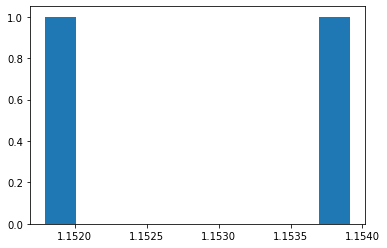

In [39]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

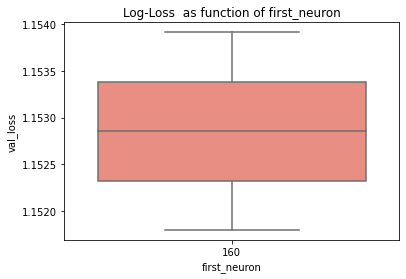

In [40]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

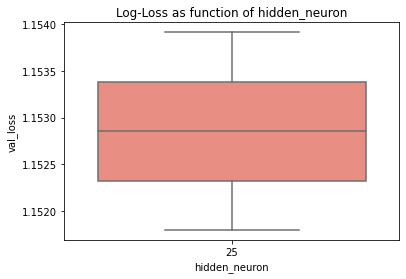

In [41]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

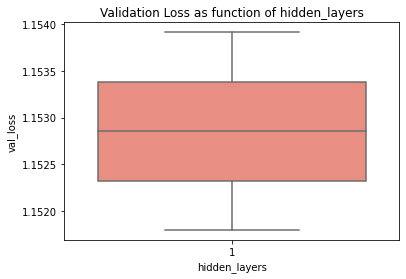

In [42]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

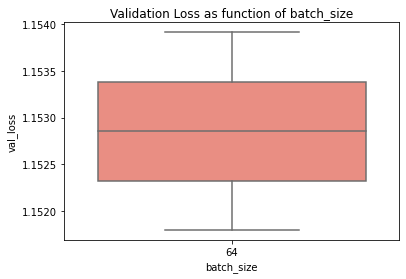

In [43]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.5 kernel_initializer

Text(0.5, 1.0, 'Validation Loss as function of kernel_initializer')

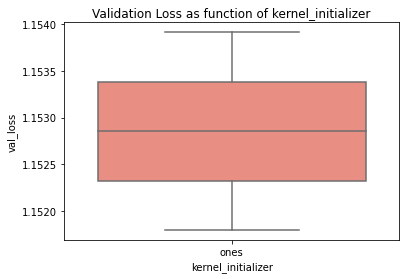

In [44]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 activation_layer

Text(0.5, 1.0, 'Validation Loss as function of activation_layer')

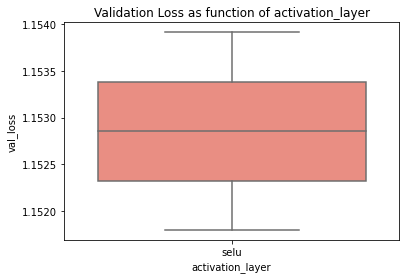

In [45]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 Optimizer

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

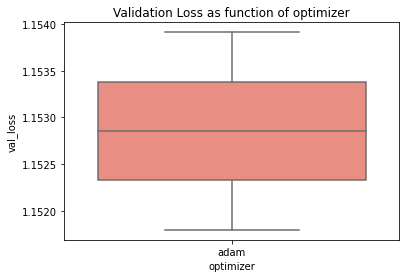

In [46]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.7 Batch normalization

Text(0.5, 1.0, 'Validation Loss as function of batc_normalization')

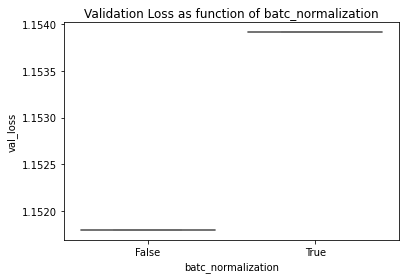

In [47]:
metric = 'batc_normalization'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

Text(0.5, 1.0, 'CI Validation Loss as function of batch normalization')

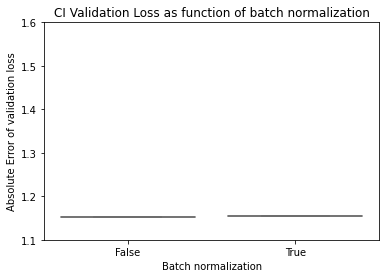

In [4]:
metric = 'batc_normalization'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Batch normalization')
ax.set_title('CI Validation Loss as function of batch normalization') #ta
